I already did some more advanced work in data science, but what a data scientist would I be if I hadn't make submission in Titanic Challange? So let's get started!

# Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Validation
from sklearn.model_selection import cross_val_score

#Metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

import warnings
warnings.filterwarnings('ignore')

So after some imports take a look what we have in our data.

# EDA (Early Data Analysis)

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We have three files. *gender_sumbission* is only for check our prediction model results on *test* data. We don't need to bother about it for now. Let's check *train* data instead.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Find missing values

<AxesSubplot:>

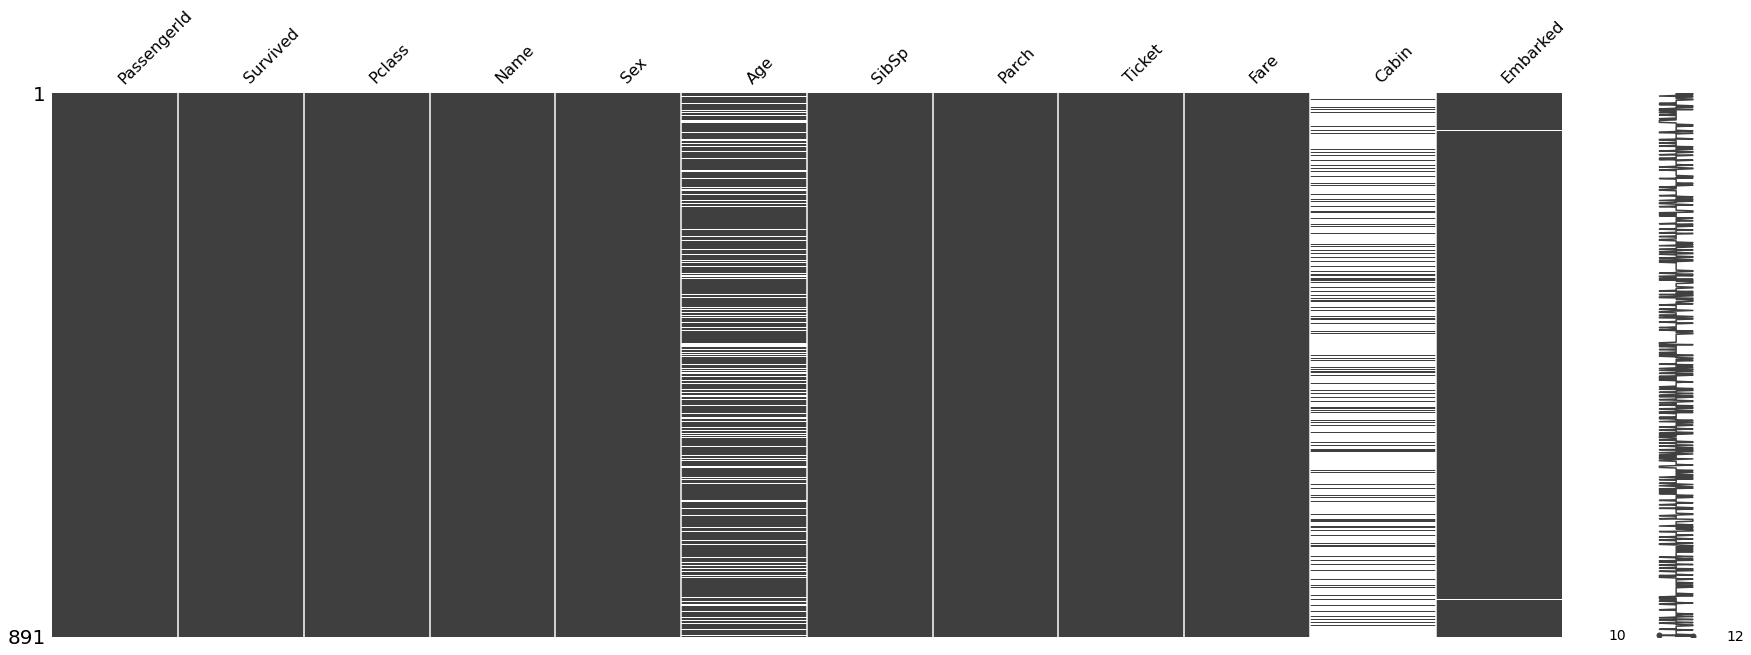

In [7]:
missingno.matrix(train, figsize = (30,10)) #really like this way of visualization of missing values

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print("% of missing values in Age column: ", round(train["Age"].isnull().sum()/len(train)*100, 2))
print("% of missing values in Cabin column: ", round(train["Cabin"].isnull().sum()/len(train)*100, 2))
print("% of missing values in Embarked column: ", round(train["Embarked"].isnull().sum()/len(train)*100, 2))

% of missing values in Age column:  19.87
% of missing values in Cabin column:  77.1
% of missing values in Embarked column:  0.22


As we see, we have some missing values (quite a lot, if you look at Cabin column). We'll face them later, for now and creating first and baseline model just remove them from dataset. I remove all columns, but probably for Embarked it would be enough to drop only two rows that have missing values.

In [10]:
df_train = train.drop(["Age", "Cabin", "Embarked"], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


# Look cosely on each column

Since we have to predict if passenger survived or not, let's look closely on Survived column.

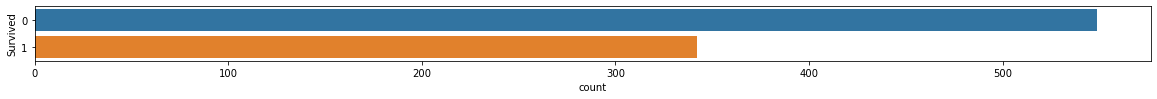

In [11]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=df_train);

Quite good distribution for us (not for passengers, unfortunately). Nothing to do here for now, we can focus on features. First Pclass, which is ticket class.

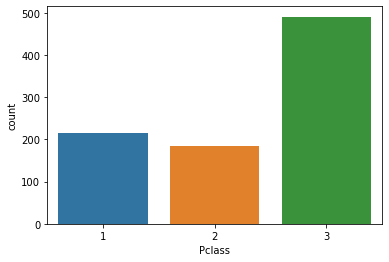

In [12]:
sns.countplot(x='Pclass', orient='v', data=df_train);

It's interesting, that there was more first class tickets, than second class.
But as we know for Titanic film, you had much higher probability to survive, when you had first class ticket (poor Jack). Is our data confirm that?

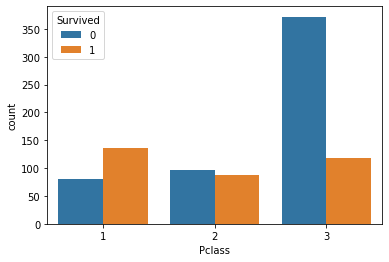

In [13]:
sns.countplot(x='Pclass', orient='v', hue="Survived", data=df_train);

In [14]:
print("% survived in first class:", round(df_train.Survived[(df_train.Pclass == 1) & (df_train.Survived == 1)].count()/df_train.Pclass[df_train.Pclass == 1].count()*100, 2))
print("% survived in second class:", round(df_train.Survived[(df_train.Pclass == 2) & (df_train.Survived == 1)].count()/df_train.Pclass[df_train.Pclass == 2].count()*100, 2))
print("% survived in first class:", round(df_train.Survived[(df_train.Pclass == 3) & (df_train.Survived == 1)].count()/df_train.Pclass[df_train.Pclass == 3].count()*100, 2))

% survived in first class: 62.96
% survived in second class: 47.28
% survived in first class: 24.24


As we suspected - near 2/3 first class passengers survived, while only 1/4 third class passengers. Definitely we should leave this columns in our dataframe.

Check Name column now.

In [15]:
df_train["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [16]:
df_train["Name"].value_counts()

Thorne, Mrs. Gertrude Maybelle                         1
Hale, Mr. Reginald                                     1
Moran, Mr. Daniel J                                    1
Thayer, Mr. John Borland                               1
Carlsson, Mr. August Sigfrid                           1
                                                      ..
Murphy, Miss. Katherine "Kate"                         1
Johnston, Miss. Catherine Helen "Carrie"               1
Molson, Mr. Harry Markland                             1
Troutt, Miss. Edwina Celia "Winnie"                    1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Name: Name, Length: 891, dtype: int64

We have to put much effort to make something useful from it. We'll do it later, for now just drop this column, because we just want create baseline predict model.

In [17]:
df_train = df_train.drop("Name", axis=1)
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,male,1,0,A/5 21171,7.2500
1,2,1,1,female,1,0,PC 17599,71.2833
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,1,0,113803,53.1000
4,5,0,3,male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000
887,888,1,1,female,0,0,112053,30.0000
888,889,0,3,female,1,2,W./C. 6607,23.4500
889,890,1,1,male,0,0,111369,30.0000


We knowe already, that film "Titanic" has right in Rose-Jack situation about they tickets. And how about their gender?

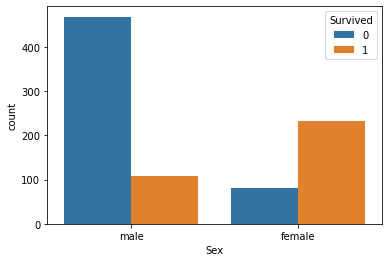

In [18]:
sns.countplot(x="Sex", hue="Survived", data=df_train);

In [19]:
print("% survived in males:", round(df_train.Survived[(df_train.Sex == "male") & (df_train.Survived == 1)].count()/df_train.Sex[df_train.Sex == "male"].count()*100, 2))
print("% survived in females:", round(df_train.Survived[(df_train.Sex == "female") & (df_train.Survived == 1)].count()/df_train.Sex[df_train.Sex == "female"].count()*100, 2))

% survived in males: 18.89
% survived in females: 74.2


Not the best situation for us, guys. Again - we want to keep this column for sure. But for our machine learning models we need to change categories to numerical.

In [20]:
df_train["Sex"] = np.where(df_train["Sex"] == "female", 1, 0)
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,0,1,0,A/5 21171,7.2500
1,2,1,1,1,1,0,PC 17599,71.2833
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250
3,4,1,1,1,1,0,113803,53.1000
4,5,0,3,0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,211536,13.0000
887,888,1,1,1,0,0,112053,30.0000
888,889,0,3,1,1,2,W./C. 6607,23.4500
889,890,1,1,0,0,0,111369,30.0000


Two next columns looks quite similiar. SibSp is number of siblings / spouses aboard the Titanic and Parch is number. of parents / children aboard the Titanic. Let's look closer at it.

In [21]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

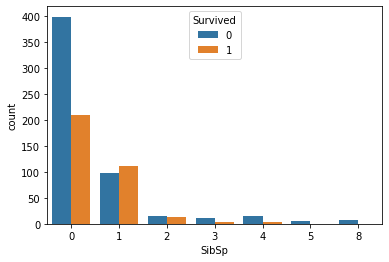

In [23]:
sns.countplot(x="SibSp", hue="Survived", data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

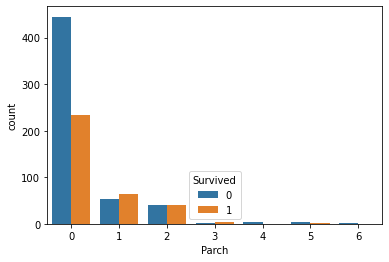

In [24]:
sns.countplot(x="Parch", hue="Survived", data=df_train)

Most passengers have traveled alone, but who has been with family or spouse (especially one or two) had much better chances to survive. We could have assumptions about it (parents rescue their childrens, men rescue their wifes and fiancees), but leave this column at it is for now.

Check Ticket column.

In [25]:
df_train["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

Once more, we need dive deeply in, and we don't want now. Drop it and check last column.

In [26]:
df_train = df_train.drop("Ticket", 1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,0,1,0,7.2500
1,2,1,1,1,1,0,71.2833
2,3,1,3,1,0,0,7.9250
3,4,1,1,1,1,0,53.1000
4,5,0,3,0,0,0,8.0500


In [27]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
first_class_mean = df_train.Fare[df_train.Pclass == 1].mean()
second_class_mean = df_train.Fare[df_train.Pclass == 2].mean()
third_class_mean = df_train.Fare[df_train.Pclass == 3].mean()
print("Mean fare for first class ticket:", round(first_class_mean, 2))
print("Mean fare for second class ticket:", round(second_class_mean, 2))
print("Mean fare for third class ticket:", round(third_class_mean, 2))

Mean fare for first class ticket: 84.15
Mean fare for second class ticket: 20.66
Mean fare for third class ticket: 13.68


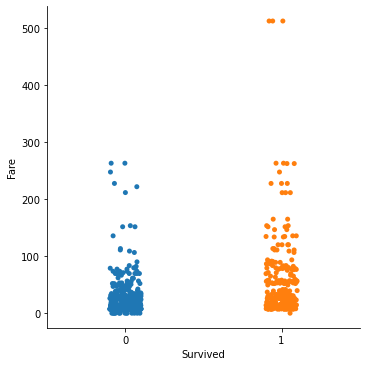

In [29]:
sns.catplot(x="Survived", y="Fare", data=df_train);

As we could suppose, first class tickets were more expensive than others. On plot we can see that we have probably two extreme values, and generally higher fare = higher chances to survive. Maybe we could make more conlusions with that column, but leave it, at least for now.

In [30]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,0,1,0,7.2500
1,2,1,1,1,1,0,71.2833
2,3,1,3,1,0,0,7.9250
3,4,1,1,1,1,0,53.1000
4,5,0,3,0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000
887,888,1,1,1,0,0,30.0000
888,889,0,3,1,1,2,23.4500
889,890,1,1,0,0,0,30.0000


Ok, I see now that we don't need PassengerId. Just drop it.

In [31]:
df_train = df_train.drop("PassengerId", 1)
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000
887,1,1,1,0,0,30.0000
888,0,3,1,1,2,23.4500
889,1,1,0,0,0,30.0000


We have now 5 features columns and our label column Survived. All values are numerical, which is good. But we should check that numbers are nominal or ordinal.

Generally, difference is that nominal values we can't compare. E.g. if we have category of cars, were 0 is red, and 1 is black, we can't say, that black is more than red. But we can say, that 2 liters engine capacity is more than 1.5 - that's ordinal value.

In our case all values expected Fare are nominal.

## Encoding

We should encode our ordinal to 0 and 1. Let's use OneHotEncoder.

In [32]:
one_hot_cols = ["Pclass", "SibSp", "Parch"]
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(enc.fit_transform(df_train[one_hot_cols]))
OH_cols.columns = enc.get_feature_names(one_hot_cols)

df_train_enc = df_train.drop(one_hot_cols, 1)
df_train_enc = pd.concat([df_train_enc, OH_cols], 1)
df_train_enc

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1,1,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,1,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Bulding models

Now we're ready to start building our machine learning models! Number of samples is low, so we can check many models with different algorithms.

But first we have to separate our label and features. 

In [33]:
X_train = df_train_enc.drop("Survived", 1)
y_train = df_train_enc["Survived"]

In [34]:
print(X_train.shape)
print(y_train.shape)

(891, 19)
(891,)


To prevent re-typing very similar code let's create function for testing algorithms. It's also help if we would like to expand our job with algorithms.

In [35]:
def test_algorithm(model):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores.mean()

acc_scores = {}

Logistic Regression

In [36]:
logreg = LogisticRegression()
logreg_acc = test_algorithm(logreg)
acc_scores["Logistic Regression"] = logreg_acc

0.79 accuracy with a standard deviation of 0.01


K-Nearest Neighbours

In [37]:
knn = KNeighborsClassifier()
knn_acc = test_algorithm(knn)
acc_scores["KNN"] = knn_acc

0.76 accuracy with a standard deviation of 0.04


Gaussian Naive Bayes

In [38]:
gnb = GaussianNB()
gnb_acc = test_algorithm(gnb)
acc_scores["Gaussian Naive Bayes"] = gnb_acc

0.42 accuracy with a standard deviation of 0.01


Linear Support Vector Machines

In [39]:
svc = LinearSVC()
svc_acc = test_algorithm(svc)
acc_scores["SVC"] = svc_acc

0.76 accuracy with a standard deviation of 0.05


Stochastic Gradient Descent

In [40]:
sgd = SGDClassifier()
sgd_acc = test_algorithm(sgd)
acc_scores["Stochastic Gradient Descent"] = sgd_acc

0.67 accuracy with a standard deviation of 0.06


Decision Tree Classifier

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree_acc = test_algorithm(decision_tree)
acc_scores["Decision Tree"] = decision_tree_acc

0.80 accuracy with a standard deviation of 0.03


Gradient Boost Trees

In [42]:
gbc = GradientBoostingClassifier()
gbc_acc = test_algorithm(gbc)
acc_scores["Gradient Boosting"] = gbc_acc

0.80 accuracy with a standard deviation of 0.03


We saved all scores to acc_scores dictiorany. Check which model have best accuracy. 

In [43]:
acc_scores_df = pd.DataFrame(acc_scores.values(), index=acc_scores.keys())
acc_scores_df.columns = ["Score"]
acc_scores_df.sort_values(by="Score", ascending=False)

,Score
Gradient Boosting,0.802536
Decision Tree,0.798023
Logistic Regression,0.791250
SVC,0.764415
KNN,0.761001
Stochastic Gradient Descent,0.672243
Gaussian Naive Bayes,0.423106


# Sumbission

Now we only need to make our submission.

This time we reproduce our code that edit our test dataframe, but in next steps we'll create pipelines, which allows us to avoid re-typing.

In [44]:
df_test = test
df_test = df_test.drop(["Name", "Age", "Ticket", "Cabin", "Embarked"], 1)
df_test = df_test.fillna(df_test["Fare"].mean()) #we have one missing value in Fare columns, let's fill it with mean from all values in column

df_test["Sex"] = np.where(df_test["Sex"] == "female", 1, 0)

OH_cols = pd.DataFrame(enc.transform(df_test[one_hot_cols]))
OH_cols.columns = enc.get_feature_names(one_hot_cols)

df_test_enc = df_test.drop(one_hot_cols, 1)
df_test_enc = pd.concat([df_test_enc, OH_cols], 1)
df_test_enc

,PassengerId,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,892,0,7.8292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,1,7.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,894,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,0,8.6625,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,896,1,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306,1,108.9000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1307,0,7.2500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We didn't return our model earlier, so now we have train it again. We'll fix this neglect later.

In [45]:
X_test = df_test_enc.drop("PassengerId", 1)
gbc.fit(X_train, y_train)
y_test = gbc.predict(X_test)
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Ok, we have our predictions. Let's create submission dataframe. As we saw earlier, we need columns PassengerId and Survived.

In [46]:
df_submission = pd.DataFrame()
df_submission["PassengerId"] = df_test["PassengerId"]
df_submission["Survived"] = y_test
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Great! Now save our submission dataframe.

In [47]:
df_submission.to_csv("./submission.csv", index=False)

# More advanced work with columns

We are done!

Almost, to be precise. Still are many things we could do better. But our first submission is ready. Below is more advanced stuff, which I think may improve our score. 

First look again on columns we drop because of missing values.

In [48]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [49]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
train.Age.dropna().sort_values().head(20)

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
183    1.00
386    1.00
172    1.00
788    1.00
642    2.00
7      2.00
530    2.00
297    2.00
824    2.00
205    2.00
Name: Age, dtype: float64

I supossed, that maybe children's age wasn't write, but I was wrong. 

We could fill missing values with mean, but let's first check % of survives in each age category.

In [51]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
buckets = pd.cut(train['Age'].dropna(), bins=bins)
buckets

0      (20, 30]
1      (30, 40]
2      (20, 30]
3      (30, 40]
4      (30, 40]
         ...   
885    (30, 40]
886    (20, 30]
887    (10, 20]
889    (20, 30]
890    (30, 40]
Name: Age, Length: 714, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

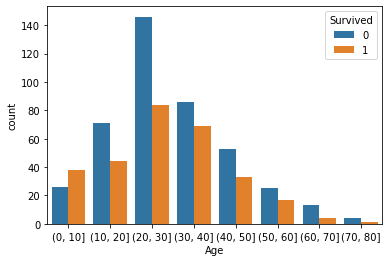

In [52]:
sns.countplot(x=pd.cut(train['Age'].dropna(), bins=bins), orient='v', hue="Survived", data=train.drop(["Embarked","Cabin"], 1).dropna());

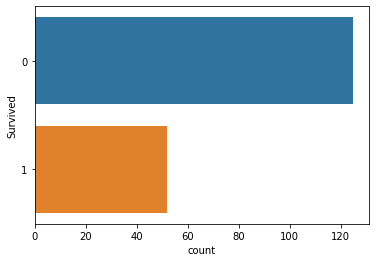

In [53]:
nan_age = train[train["Age"].isna()]
sns.countplot(y="Survived", data=nan_age);

I was afraid that fill Age column with mean could affect on our predictions, but it shouldn't since Survived/Not-survived ratio is similar for passengers with missing age nad passengers in age between 20 and 30 (mean is 29.39)

Here is tough decision (at least for me) to make. We have to decide, what we do with our Age column. Options for me:

1. We fill empty values with mean and treat Age as numerical value.
2. We put Age into bins (as you see above), mark missing values as (20,30] and treat Age as caterogical value.

For now, let's try second option.

In [54]:
new_train = pd.DataFrame()
new_train["Survived"] = train["Survived"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_bins = pd.cut(train['Age'].fillna(train['Age'].mean()), bins=bins)
new_train["Age"] = age_bins
new_train

,Survived,Age
0,0,"(20, 30]"
1,1,"(30, 40]"
2,1,"(20, 30]"
3,1,"(30, 40]"
4,0,"(30, 40]"
...,...,...
886,0,"(20, 30]"
887,1,"(10, 20]"
888,0,"(20, 30]"
889,1,"(20, 30]"


We encode this later, with other values and create pipeline.

Let's see Embarked column now. This column defines port of embarkation and C = Cherbourg, Q = Queenstown, S = Southampton.

In [55]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [56]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So we have only two missing values. I think we could just remove this rows and it wouldn't influence on our prediction, but better just fill it with "S", because in Southampton port most passengers start their journey.

In [57]:
new_train["Embarked"] = train["Embarked"].fillna("S")
new_train

,Survived,Age,Embarked
0,0,"(20, 30]",S
1,1,"(30, 40]",C
2,1,"(20, 30]",S
3,1,"(30, 40]",S
4,0,"(30, 40]",S
...,...,...,...
886,0,"(20, 30]",S
887,1,"(10, 20]",S
888,0,"(20, 30]",S
889,1,"(20, 30]",C


Now time for column, which have the most missing values and probably be the toughest one. Cabin means just cabin number.

In [58]:
print("Number of missing values:", train["Cabin"].isnull().sum())
train["Cabin"].value_counts().head(50)

Number of missing values: 687


G6                 4
C23 C25 C27        4
B96 B98            4
E101               3
D                  3
F2                 3
C22 C26            3
F33                3
D36                2
B57 B59 B63 B66    2
D33                2
C125               2
B28                2
C65                2
C123               2
E44                2
B22                2
E25                2
C2                 2
E33                2
C52                2
E24                2
E121               2
C93                2
B18                2
E67                2
B51 B53 B55        2
C124               2
B5                 2
D20                2
B77                2
B20                2
B49                2
F4                 2
C126               2
C78                2
C83                2
D26                2
B35                2
C92                2
E8                 2
D17                2
D35                2
B58 B60            2
F G73              2
C68                2
F G63              1
B101         

687 missing values means a lot. Most passengers have own cabins, but there may be some pattern in letters in cabins numbers. First check if everyone in first class have cabin.

In [59]:
print(train[~train.Cabin.isnull()].Pclass.value_counts())
print(train.Pclass.value_counts())

1    176
2     16
3     12
Name: Pclass, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


Not everyone, and unexpectedly some passengers in second and third class have cabins also. So let's check how many pasengers with cabins survived, depend on cabin letter.

In [60]:
cabin_df = pd.DataFrame()
cabin_df = train[["Survived", "Cabin"]].dropna()
cabin_df["Cabin_letter"] = cabin_df["Cabin"].str[0]
cabin_df

,Survived,Cabin,Cabin_letter
1,1,C85,C
3,1,C123,C
6,0,E46,E
10,1,G6,G
11,1,C103,C
...,...,...,...
871,1,D35,D
872,0,B51 B53 B55,B
879,1,C50,C
887,1,B42,B


<AxesSubplot:xlabel='Cabin_letter', ylabel='count'>

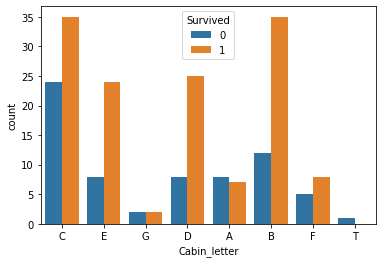

In [61]:
sns.countplot(x="Cabin_letter", hue="Survived", data=cabin_df)

As we may expect (since we know that many of first class passengers survived and most of them have own cabin) more passengers with cabins survived than not. But we have some disproportion between A, F, G and E, D, B cabins. It could help us. Let's add this column with fill our NaNs as "N" cabin.

In [62]:
new_train["Cabin_letter"] = train["Cabin"].fillna("None").str[0]
new_train

,Survived,Age,Embarked,Cabin_letter
0,0,"(20, 30]",S,N
1,1,"(30, 40]",C,C
2,1,"(20, 30]",S,N
3,1,"(30, 40]",S,C
4,0,"(30, 40]",S,N
...,...,...,...,...
886,0,"(20, 30]",S,N
887,1,"(10, 20]",S,B
888,0,"(20, 30]",S,N
889,1,"(20, 30]",C,C


So far so good.

Check if we could do something with Name column.

In [63]:
train["Name"].head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

<AxesSubplot:xlabel='Title', ylabel='count'>

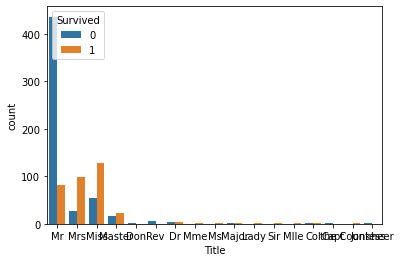

In [64]:
split_names = train["Name"].str.split('.')
titles = [x[0].split(',')[1].strip() for x in split_names]
titles_df = pd.DataFrame()
titles_df["Title"] = titles
titles_df["Survived"] = train["Survived"]
sns.countplot(x="Title", hue="Survived", data=titles_df)

In [65]:
titles_df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Don               1
Lady              1
Sir               1
Jonkheer          1
Mme               1
Ms                1
the Countess      1
Name: Title, dtype: int64

Probably nothing we can do here. Mr and Miss/Mrs titles will give us same results as Sex column. Master title have quite good survive %, but we don't add this column to our train.

We also drop Ticket, chceck this column.

In [66]:
train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [67]:
train["Ticket"].value_counts().head(50)

347082           7
1601             7
CA. 2343         7
CA 2144          6
347088           6
3101295          6
382652           5
S.O.C. 14879     5
W./C. 6608       4
19950            4
LINE             4
17421            4
4133             4
113760           4
PC 17757         4
113781           4
2666             4
347077           4
349909           4
SC/Paris 2123    3
F.C.C. 13529     3
239853           3
C.A. 34651       3
248727           3
PC 17755         3
29106            3
347742           3
13502            3
PC 17572         3
C.A. 31921       3
PC 17582         3
24160            3
345773           3
110413           3
PC 17760         3
35273            3
371110           3
363291           3
230080           3
110152           3
345764           2
349237           2
110465           2
A/4 48871        2
113803           2
S.O./P.P. 3      2
113806           2
2651             2
370365           2
111361           2
Name: Ticket, dtype: int64

In [68]:
split_tickets = train["Ticket"].str.split(' ')
split_tickets = [x[1] if len(x) > 1 else x[0] for x in split_tickets]
split_tickets

['21171',
 '17599',
 '3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 '9549',
 '113783',
 '2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 '17601',
 '17569',
 '335677',
 '24579',
 '17604',
 '113789',
 '2677',
 '2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 '2123',
 '330958',
 '23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 '39886',
 '17572',
 '2926',
 '113509',
 '19947',
 '31026',
 '2697',
 '34651',
 '2144',
 '2669',
 '113572',
 '36973',
 '347088',
 '17605',
 '2661',
 '29395',
 '3464',
 '3101281',
 '315151',
 '33111',
 '2144',
 '14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 '14885',
 '3101278',
 '6608',
 '392086',
 '19950',
 '343275',
 '343276',
 '347466',
 '5734',
 '2315',
 '364500',
 '374910',
 '17754

In [69]:
tickets_df = pd.DataFrame()
tickets_df["Survived"] = train["Survived"]
tickets_df["Ticket"] = split_tickets
tickets_df

,Survived,Ticket
0,0,21171
1,1,17599
2,1,3101282
3,1,113803
4,0,373450
...,...,...
886,0,211536
887,1,112053
888,0,6607
889,1,111369


In [70]:
tickets_df_filtered = tickets_df.drop(tickets_df[(tickets_df["Ticket"] == "2.") | (tickets_df["Ticket"] == 'LINE')].index)

In [71]:
tickets_df_filtered["Ticket"] = pd.to_numeric(tickets_df_filtered["Ticket"], errors='coerce')

In [72]:
bins = [0, 5000, 10000, 50000, 100000, 200000]
tickets_df_filtered["Ticket"] = tickets_df_filtered["Ticket"].dropna().astype('float')
#tickets_bins = pd.cut(tickets_df_filtered["Ticket"], bins=bins)
tickets_bins = pd.qcut(tickets_df_filtered["Ticket"], q=5) #qcut divide data into equal bins
tickets_bins 

0         (11483.2, 28573.6]
1         (11483.2, 28573.6]
2      (349212.4, 3101317.0]
3        (28573.6, 237647.4]
4      (349212.4, 3101317.0]
               ...          
886      (28573.6, 237647.4]
887      (28573.6, 237647.4]
888         (2.999, 11483.2]
889      (28573.6, 237647.4]
890    (349212.4, 3101317.0]
Name: Ticket, Length: 875, dtype: category
Categories (5, interval[float64]): [(2.999, 11483.2] < (11483.2, 28573.6] < (28573.6, 237647.4] < (237647.4, 349212.4] < (349212.4, 3101317.0]]

<AxesSubplot:xlabel='Ticket', ylabel='count'>

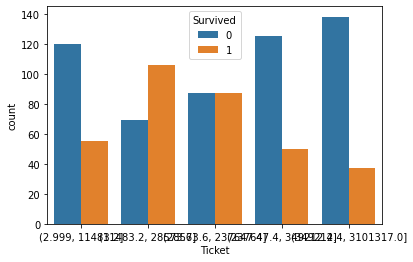

In [73]:
sns.countplot(x=tickets_bins, hue="Survived", data=tickets_df_filtered)

That's something! We get only numbers from Ticket column (drop some strange values that was produced during spliting), then divide them up to equal bins. And now we can say, that if you have ticket number below 11483 or higher than 237647 risk than you didn't survive Titanic disaster increases significantly.

I wanted just add our strange values ("2.", "LINE", and some strings) to middle bin (as you can see in commented code), instead of I change these values to NaN and then fill them with backfill method. It means that we use next valid information to fill gap.

In [74]:
new_train["Ticket_number"] = tickets_df["Ticket"]
new_train.loc[(new_train["Ticket_number"] == "2.") | (new_train["Ticket_number"] == 'LINE'), "Ticket_number"] = np.NaN
new_train["Ticket_number"]  = pd.to_numeric(new_train["Ticket_number"], errors='coerce')
new_train["Ticket_number"] = new_train["Ticket_number"].fillna(method="backfill")
tickets_df_filtered["Ticket"] = tickets_df_filtered["Ticket"].dropna().astype('float')
new_train["Ticket_number"] = pd.qcut(new_train["Ticket_number"], q=5)

#new_train["Ticket_number"] = new_train["Ticket_number"].astype("string")
#new_train["Ticket_number"].fillna("(28573.6, 237647.4]")
#new_train[new_train["Ticket_number"].isnull()]
#new_train["Ticket_number"] = new_train["Ticket_number"].astype("category")


In [75]:
new_train

,Survived,Age,Embarked,Cabin_letter,Ticket_number
0,0,"(20, 30]",S,N,"(10482.0, 28425.0]"
1,1,"(30, 40]",C,C,"(10482.0, 28425.0]"
2,1,"(20, 30]",S,N,"(349209.0, 3101317.0]"
3,1,"(30, 40]",S,C,"(28425.0, 237442.0]"
4,0,"(30, 40]",S,N,"(349209.0, 3101317.0]"
...,...,...,...,...,...
886,0,"(20, 30]",S,N,"(28425.0, 237442.0]"
887,1,"(10, 20]",S,B,"(28425.0, 237442.0]"
888,0,"(20, 30]",S,N,"(2.999, 10482.0]"
889,1,"(20, 30]",C,C,"(28425.0, 237442.0]"


Great, we've looked again at all columns we droped earlier and we handle with all of them except Name.

Let's add to our dataframe columns, which we've already analyzed.

In [76]:
new_train[["Pclass", "Sex", "SibSp", "Parch", "Fare"]] = train[["Pclass", "Sex", "SibSp", "Parch", "Fare"]]
new_train

,Survived,Age,Embarked,Cabin_letter,Ticket_number,Pclass,Sex,SibSp,Parch,Fare
0,0,"(20, 30]",S,N,"(10482.0, 28425.0]",3,male,1,0,7.2500
1,1,"(30, 40]",C,C,"(10482.0, 28425.0]",1,female,1,0,71.2833
2,1,"(20, 30]",S,N,"(349209.0, 3101317.0]",3,female,0,0,7.9250
3,1,"(30, 40]",S,C,"(28425.0, 237442.0]",1,female,1,0,53.1000
4,0,"(30, 40]",S,N,"(349209.0, 3101317.0]",3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0,"(20, 30]",S,N,"(28425.0, 237442.0]",2,male,0,0,13.0000
887,1,"(10, 20]",S,B,"(28425.0, 237442.0]",1,female,0,0,30.0000
888,0,"(20, 30]",S,N,"(2.999, 10482.0]",3,female,1,2,23.4500
889,1,"(20, 30]",C,C,"(28425.0, 237442.0]",1,male,0,0,30.0000


So what else we can do? I think since people who have sibling/spouse or/and parents/children on board, generally have more chances to survive, we'll produce new column based on SibSp and Parch, where we define if passenger had somebody related with him on ship.

In [77]:
new_train["SibSpParch"] = np.where(new_train["SibSp"] + new_train["Parch"] > 0, 1, 0)
new_train

,Survived,Age,Embarked,Cabin_letter,Ticket_number,Pclass,Sex,SibSp,Parch,Fare,SibSpParch
0,0,"(20, 30]",S,N,"(10482.0, 28425.0]",3,male,1,0,7.2500,1
1,1,"(30, 40]",C,C,"(10482.0, 28425.0]",1,female,1,0,71.2833,1
2,1,"(20, 30]",S,N,"(349209.0, 3101317.0]",3,female,0,0,7.9250,0
3,1,"(30, 40]",S,C,"(28425.0, 237442.0]",1,female,1,0,53.1000,1
4,0,"(30, 40]",S,N,"(349209.0, 3101317.0]",3,male,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"(20, 30]",S,N,"(28425.0, 237442.0]",2,male,0,0,13.0000,0
887,1,"(10, 20]",S,B,"(28425.0, 237442.0]",1,female,0,0,30.0000,0
888,0,"(20, 30]",S,N,"(2.999, 10482.0]",3,female,1,2,23.4500,1
889,1,"(20, 30]",C,C,"(28425.0, 237442.0]",1,male,0,0,30.0000,0


Everything looks fine, so we can drop columns SibSp and Parch.

In [78]:
new_train = new_train.drop(["SibSp", "Parch"], 1)
new_train

,Survived,Age,Embarked,Cabin_letter,Ticket_number,Pclass,Sex,Fare,SibSpParch
0,0,"(20, 30]",S,N,"(10482.0, 28425.0]",3,male,7.2500,1
1,1,"(30, 40]",C,C,"(10482.0, 28425.0]",1,female,71.2833,1
2,1,"(20, 30]",S,N,"(349209.0, 3101317.0]",3,female,7.9250,0
3,1,"(30, 40]",S,C,"(28425.0, 237442.0]",1,female,53.1000,1
4,0,"(30, 40]",S,N,"(349209.0, 3101317.0]",3,male,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,"(20, 30]",S,N,"(28425.0, 237442.0]",2,male,13.0000,0
887,1,"(10, 20]",S,B,"(28425.0, 237442.0]",1,female,30.0000,0
888,0,"(20, 30]",S,N,"(2.999, 10482.0]",3,female,23.4500,1
889,1,"(20, 30]",C,C,"(28425.0, 237442.0]",1,male,30.0000,0


Now we need encode our caterogical values to numbers.

In [79]:
one_hot_cols = ["Pclass", "Age", "Embarked", "Cabin_letter", "Ticket_number", "Sex"]
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(enc.fit_transform(new_train[one_hot_cols]))
OH_cols.columns = enc.get_feature_names(one_hot_cols)

new_train_enc = new_train.drop(one_hot_cols, 1)
new_train_enc = pd.concat([new_train_enc, OH_cols], 1)
new_train_enc

,Survived,Fare,SibSpParch,Pclass_1,Pclass_2,Pclass_3,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]",...,Cabin_letter_G,Cabin_letter_N,Cabin_letter_T,"Ticket_number_(2.999, 10482.0]","Ticket_number_(10482.0, 28425.0]","Ticket_number_(28425.0, 237442.0]","Ticket_number_(237442.0, 349209.0]","Ticket_number_(349209.0, 3101317.0]",Sex_female,Sex_male
0,0,7.2500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,71.2833,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,7.9250,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,53.1000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,8.0500,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1,30.0000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
888,0,23.4500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1,30.0000,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Train model

We could train our model now, but first let's think about our test data. If we would like to check our score on test data we need to make same operation as on train data, so rewrite all the code, that transform data. How avoid that? We can make function to preprocessing or make pipeline. For now try function.

In [80]:
def preprocessing(df, ticket_bins=[], enc=None):
    new_df = pd.DataFrame()
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    new_df["Age"] = pd.cut(df['Age'].fillna(df['Age'].mean()), bins=age_bins)
    new_df["Embarked"] = df["Embarked"].fillna("S")
    new_df["Cabin_letter"] = df["Cabin"].fillna("None").str[0]
    
    #tickets
    split_tickets = df["Ticket"].str.split(' ')
    split_tickets = [x[1] if len(x) > 1 else x[0] for x in split_tickets]
    new_df["Ticket_number"] = split_tickets
    new_df.loc[(new_df["Ticket_number"] == '2') | (new_df["Ticket_number"] == "2.") | (new_df["Ticket_number"] == 'LINE'), "Ticket_number"] = np.NaN

    new_df["Ticket_number"]  = pd.to_numeric(new_df["Ticket_number"], errors='coerce')
    
    new_df["Ticket_number"] = new_df["Ticket_number"].fillna(method="bfill")
    
    if len(ticket_bins) < 1:
        new_df["Ticket_number"], ticket_bins = pd.qcut(new_df["Ticket_number"], q=5, retbins=True)
    else:
        new_df["Ticket_number"] = pd.cut(new_df["Ticket_number"], bins = ticket_bins)
    
    
    new_df[["Pclass", "Sex", "SibSp", "Parch", "Fare"]] = df[["Pclass", "Sex", "SibSp", "Parch", "Fare"]]
    new_df["SibSpParch"] = np.where(df["SibSp"] + df["Parch"] > 0, 1, 0)
    new_df = new_df.drop(["SibSp", "Parch"], 1)
    new_df["Fare"] = new_df["Fare"].fillna(method="bfill")
    
    one_hot_cols = ["Pclass", "Age", "Embarked", "Cabin_letter", "Ticket_number", "Sex"]
    if enc == None:
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        OH_cols = pd.DataFrame(enc.fit_transform(new_df[one_hot_cols]))
        
    else:
        OH_cols = pd.DataFrame(enc.transform(new_df[one_hot_cols]))
    OH_cols.columns = enc.get_feature_names(one_hot_cols)

    new_df_enc = new_df.drop(one_hot_cols, 1)
    new_df_enc = pd.concat([new_df_enc, OH_cols], 1)
    
    return new_df_enc, ticket_bins, enc

We return ticket_bins (with retbins=True in pd.qcut function) and encoder, because we will need it in test data preprocessing.

Check if our function work properly.

In [81]:
train_by_function, ticket_bins, enc = preprocessing(train)
if train_by_function.shape == new_train_enc.drop("Survived", 1).shape:
    print("Both dataframes have same shape")
else:
    print("Something wrong with preprocessing function")

Both dataframes have same shape


Try our algorithms.

In [82]:
models = logreg, knn, gnb, svc, sgd, decision_tree, gbc

def new_test_algorithm(model, X_train, y_train):
    accuracies = {}
    trained_models = {}
    for model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(model, "%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        accuracies[model] = scores.mean()
    return accuracies


accs = new_test_algorithm(gbc, train_by_function, train["Survived"])

LogisticRegression() 0.79 accuracy with a standard deviation of 0.02
KNeighborsClassifier() 0.75 accuracy with a standard deviation of 0.04
GaussianNB() 0.73 accuracy with a standard deviation of 0.05
LinearSVC() 0.76 accuracy with a standard deviation of 0.04
SGDClassifier() 0.76 accuracy with a standard deviation of 0.06
DecisionTreeClassifier() 0.79 accuracy with a standard deviation of 0.04
GradientBoostingClassifier() 0.82 accuracy with a standard deviation of 0.02


Again Gradient Boosting Classifier have best accuracy score. Make submission with this model and then check if it's *really* the best.

# Submission

In [83]:
gbc.fit(train_by_function, train["Survived"])
X_test, _, _ = preprocessing(test, ticket_bins, enc)
X_test.isnull().sum()
y_test = gbc.predict(X_test)
df_submission = pd.DataFrame()
df_submission["PassengerId"] = test["PassengerId"]
df_submission["Survived"] = y_test
df_submission.to_csv("./submission_2.csv", index=False)

We already checked our models with accuracy score, which is quite good if you are sure that your model work properly. But imagine some situation, that you have in your test data 990 who survived and only 10 who didn't survive. If your model didn't do well, it could give in predictions all 1000 passengers as "not survived" and still have 100% of accuracy! That's ridiculous. To avoid that, we can use different evaluation metrics. Most common in classification problem are Confusion Matrix, ROC AUC and F1 Score. Let's check Confusion Matrix.

In [84]:
matrix = confusion_matrix(gender_submission.Survived, y_test)
print(matrix)

[[245  21]
 [ 27 125]]


So what the heck is that? Easy - we got 245 people, who we predict that didn't survive and actually they didn't. But 21 that we predict dead already survived. 27 who w predict as "survived" didn't, and 152 we corectly predicted live after disaster.

In [85]:
print("People who didn't survived and predicted didn't survived:", matrix[0][0])
print("People who survived and predicted didn't survived:", matrix[0][1])
print("People who didn't survived and predicted survived:", matrix[1][0])
print("People who survived and predicted survived:", matrix[1][1])

People who didn't survived and predicted didn't survived: 245
People who survived and predicted didn't survived: 21
People who didn't survived and predicted survived: 27
People who survived and predicted survived: 125
